# **Using the `explode()` Function for Further Analysis by Transforming Lists into Rows**

In [1]:
# Importing Libraries
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# Getting the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Huawei\.cache\kagglehub\datasets\ankushpanday1\global-population-dataset-20142024\versions\1\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Expanding the 'job_skills' column by transforming list values into separate rows

In [ ]:
df_exploded = df.explode('job_skills')

# Display the transformed DataFrame
df_exploded


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


## Counting the Most Common Skills by Job Title

In [ ]:
# Group by job title and skills, then count occurrences
skill_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

# Convert the grouped data into a DataFrame with a new column 'skill_count'
df_skill_count = skill_count.reset_index(name='skill_count')

# Sort the DataFrame by skill count in descending order
df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)

# Display the sorted skill count DataFrame
df_skill_count


,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
45,Business Analyst,digitalocean,1
2241,Software Engineer,visualbasic,1
29,Business Analyst,codecommit,1
24,Business Analyst,chainer,1


## Visualizing the Top 10 Skills Required for a Specific Job Title

<function matplotlib.pyplot.show(close=None, block=None)>

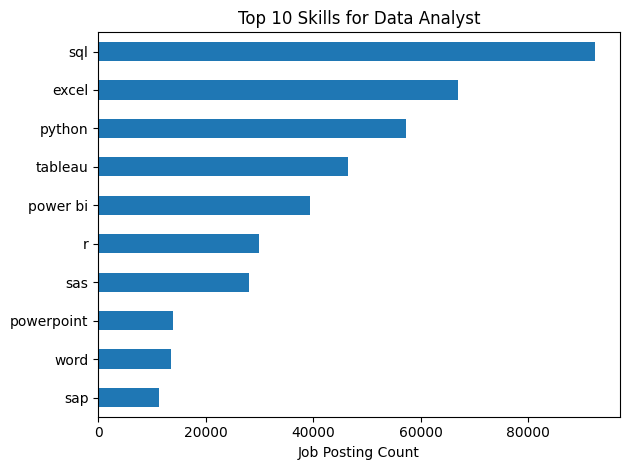

In [ ]:
# Define the target job title and the number of top skills to display
job_title = 'Data Analyst'
top_skills = 10

# Filter the dataset to include only the specified job title and select the top skills
df_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)

# Create a horizontal bar plot of the top skills for the job title
df_final.plot(kind='barh', x='job_skills', y='skill_count')

# Invert the y-axis so the most in-demand skills appear at the top
plt.gca().invert_yaxis()

# Add title and labels
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.xlabel('Job Posting Count')
plt.ylabel('')  # Remove y-axis label for cleaner visualization

# Hide legend for clarity
plt.legend().set_visible(False)

# Adjust layout for better readability
plt.tight_layout()

# Display the plot
plt.show()

